In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pyproj import Proj

from matplotlib import rc

# Latex rendering for plotting
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = [r'\boldmath']

/Users/alicepagano/anaconda3/envs/life/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  if sys.path[0] == '':


In [2]:
pp = Proj(proj='utm',zone=32,ellps='WGS84', preserve_units=False)

# Create region list of Italy
df_region = pd.read_excel('useful_datasets/italian_regions_dataset.xlsx',engine='openpyxl',index_col=0,header=[0])
df_region["capitals"] = df_region["capitals"].str.upper()

xx, yy = pp(df_region['lon'].values, df_region[('lat')].values)
df_region['lon_WGS'] = xx
df_region['lat_WGS'] = yy

gdf_region = gpd.GeoDataFrame(
    df_region, geometry=gpd.points_from_xy(df_region['lon_WGS'], df_region['lat_WGS']))

## Data 2017

In [3]:
# Load Italy province map
fp = 'map/ProvCM01012018_WGS84.shp'
data = gpd.read_file(fp)

# Load epidemiological dataset
epi = 'useful_datasets/dati_sanitari_2017.xlsx'
data_epi = pd.read_excel(epi,engine='openpyxl')

prov_data_epi = list(data_epi['Provincia'])
prov_data = list(data_epi['Copertura_media'])
for i in range(len(prov_data_epi)):
    # If city is null, associate latitude and longitude of the capital of the region
    mask_DEN_PROV = data['DEN_PROV'].str.contains(fr'\b{prov_data_epi[i]}\b', regex=True, case=False)
    mask_DEN_CM = data['DEN_CM'].str.contains(fr'\b{prov_data_epi[i]}\b', regex=True, case=False)
    mask_DEN_PCM = data['DEN_PCM'].str.contains(fr'\b{prov_data_epi[i]}\b', regex=True, case=False)
    data.loc[mask_DEN_PROV,'COPERTURA_MEDIA'] = prov_data[i]
    data.loc[mask_DEN_CM,'COPERTURA_MEDIA'] = prov_data[i]
    data.loc[mask_DEN_PCM,'COPERTURA_MEDIA'] = prov_data[i]

In [4]:
# Load tweet dataset
df = pd.read_excel('filtered_data/tweet_province_dataset_2017.xlsx',engine='openpyxl',index_col=0,header=[0,1])

xx, yy = pp(df[('user','lon_province')].values, df[('user','lat_province')].values)
df[('user','lon_province_WGS')] = xx
df[('user','lat_province_WGS')] = yy

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df[('user','lon_province_WGS')], df[('user','lat_province_WGS')]))
df.head(5)

user                      \
       screen_name                  id   
1      wushurabbit           489909029   
3          MIMIGIO           503303414   
4  vecchiaquercia8  824996743276331008   
5    Yle1807081486  824603877450321920   
6     robertaestop           171040838   

                                                                              \
                                         description                location   
1  Idee, fatti e ricerche controverse che potrebb...                    roma   
3                          PACE GIUSTIZIA E LIBERTA'                  napoli   
4                                               None  ferrara emilia romagna   
5  Se vivi la vita in punta di piedi d accordo no...         livorno toscana   
6                    Lottare...combattere...GO ALF ♥                 liguria   

                                                                     tweet  \
  followers_count favourites_count          created_at                  id   
1            1695            72013 2012-02-12 01:29:04  826350384901939200   
3            1178            82323 2012-02-25 17:30:46  825005042902134784   
4              15              100 2017-01-27 15:05:26  824997962115903488   
5              19              121 2017-01-26 13:04:19  824951154513678336   
6             391              370 2010-07-26 12:10:04  824926393389740032   

                              \
                  created_at   
1 2017-01-31 08:44:19.000000   
3 2017-01-27 15:38:23.999999   
4 2017-01-27 15:10:16.000000   
5 2017-01-27 12:04:15.999999   
6 2017-01-27 10:25:52.999999   

                                                      ...     user  \
                                                text  ... province   
1  Vaccini tra scienza e diritto.\n\nhttps://t.co...  ...     roma   
3  RT @Laurastixi: Fate una bella inchiesta sui m...  ...   napoli   
4                                #noobbligovaccinale  ...  ferrara   
5  RT @chierighini66: #noobbligovaccinale\nPrima ...  ...  livorno   
6  #Lorenzin #NoVaccini #LibertaDiScelta #Vaccini...  ...   genova   

                                                                \
  lat_province lon_province tag total_population   user_weight   
1    41.893320    12.482932   1        4263542.0  2.673833e-05   
3    40.835934    14.248783   1        3048194.0  3.280631e-07   
4    44.766764    11.827939   1         345538.0  6.945690e-05   
5    42.790219    10.340281   1         332887.0  6.008045e-06   
6    44.407260     8.933862   1         831172.0  1.203120e-06   

                                                     \
  province_weight lon_province_WGS lat_province_WGS   
1        0.000163    788948.967941     4.643800e+06   
3        0.000353    942613.775037     4.533821e+06   
4        0.000069    723788.107746     4.960932e+06   
5        0.000012    609615.828954     4.738390e+06   
6        0.000034    494733.881988     4.917110e+06   

                         geometry  
                                   
1  POINT (788948.968 4643800.061)  
3  POINT (942613.775 4533821.266)  
4  POINT (723788.108 4960932.228)  
5  POINT (609615.829 4738390.430)  
6  POINT (494733.882 4917110.057)  

[5 rows x 27 columns]

/Users/alicepagano/anaconda3/envs/life/lib/python3.7/site-packages/geopandas/plotting.py:573: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


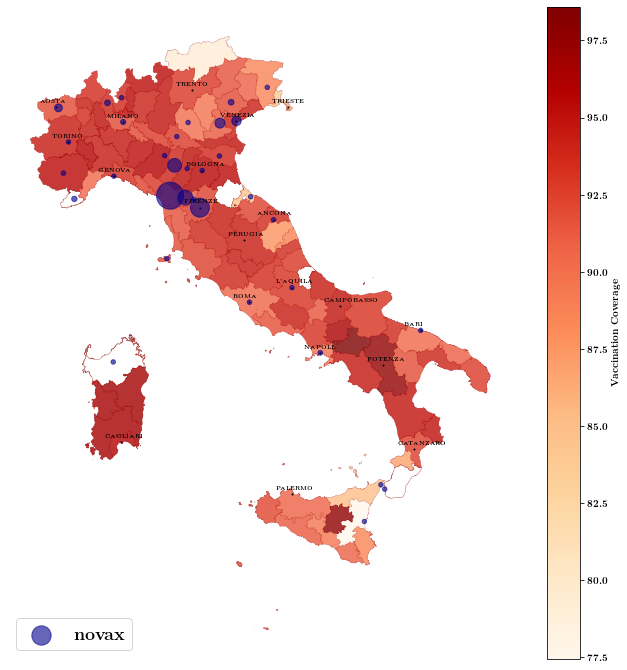

In [5]:
fig, ax = plt.subplots(figsize=(12,12)) # Create a figure and an axes.
data.boundary.plot(ax=ax,color='darkred',linewidth=0.5,alpha=0.6,zorder=1)
data.plot(ax=ax,column='COPERTURA_MEDIA',cmap='OrRd',legend=True,alpha=0.8,zorder=2,
          legend_kwds={'label': r"\bf{Vaccination Coverage}",
                       'orientation': "vertical"})
gdf_region.plot(ax=ax,column='capitals',color='black',markersize=1,zorder=3)
gdf.plot(ax=ax,markersize=list(20**3*df[('user','province_weight')]+20),color='darkblue',alpha=0.6,zorder=4,
         legend=True,label=r'\bf{novax}')

#f = ax1.figure
#cb_ax = f.axes[1]
#cb_ax.tick_params(labelsize=10)
#cb_ax.legend(title='ciao',loc='center right')

#ax.set_title(r'\bf{Geopgraphical novax distribution in Italy}',fontsize=20)
ax.legend(loc='lower left',fontsize=18,frameon=True)
ax.set_axis_off()

# Plot city names on the basemap
for index, row in df_region.iterrows():
    plt.text(row['lon_WGS']-0.35*10**5, row['lat_WGS']+0.1*10**5, r'\bf{'+str(row['capitals'])+'}', color='black', fontsize=5,zorder=6)

#ax.set_label('I am a label')
plt.savefig("map_2017.pdf",format='pdf',bbox_inches = "tight")

## Data 2018

In [6]:
# Load Italy province map
fp = 'map/ProvCM01012018_WGS84.shp'
data = gpd.read_file(fp)

# Load epidemiological dataset
epi = 'useful_datasets/dati_sanitari_2018.xlsx'
data_epi = pd.read_excel(epi,engine='openpyxl')

prov_data_epi = list(data_epi['Provincia'])
prov_data = list(data_epi['Copertura_media'])
for i in range(len(prov_data_epi)):
    # If city is null, associate latitude and longitude of the capital of the region
    mask_DEN_PROV = data['DEN_PROV'].str.contains(fr'\b{prov_data_epi[i]}\b', regex=True, case=False)
    mask_DEN_CM = data['DEN_CM'].str.contains(fr'\b{prov_data_epi[i]}\b', regex=True, case=False)
    mask_DEN_PCM = data['DEN_PCM'].str.contains(fr'\b{prov_data_epi[i]}\b', regex=True, case=False)
    data.loc[mask_DEN_PROV,'COPERTURA_MEDIA'] = prov_data[i]
    data.loc[mask_DEN_CM,'COPERTURA_MEDIA'] = prov_data[i]
    data.loc[mask_DEN_PCM,'COPERTURA_MEDIA'] = prov_data[i]

In [7]:
# Load tweet dataset
df = pd.read_excel('filtered_data/tweet_province_dataset_2018.xlsx',engine='openpyxl',index_col=0,header=[0,1])

xx, yy = pp(df[('user','lon_province')].values, df[('user','lat_province')].values)
df[('user','lon_province_WGS')] = xx
df[('user','lat_province_WGS')] = yy

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df[('user','lon_province_WGS')], df[('user','lat_province_WGS')]))
df.head(5)

user                      \
       screen_name                  id   
0   Cinzia15021967  716939268829085696   
1     Ariannar1978  766246807697514496   
5        MaKiSan43          2885743858   
18    robertaestop           171040838   
20    Luca07902927  886632503041290240   

                                                                      \
                                          description       location   
0   lavoro con i matti da tutta la vita ...oggi so...  rho lombardia   
1   💖💖 A day without laughter is a day wasted.💖💖 T...  veneto  italy   
5                                                None       firenze    
18                    Lottare...combattere...GO ALF ♥        liguria   
20                                               None  padova veneto   

                                                                \
   followers_count favourites_count                 created_at   
0              329             8202 2016-04-04 10:43:36.000000   
1              619            33481 2016-08-18 12:14:10.000000   
5              375            30617 2014-11-20 15:18:45.000001   
18             391              370 2010-07-26 12:10:04.000000   
20             171             4348 2017-07-16 17:03:56.000001   

                 tweet                      \
                    id          created_at   
0   958755740155568128 2018-01-31 17:35:55   
1   958714084001632256 2018-01-31 14:50:24   
5   958023007120838656 2018-01-29 17:04:18   
18  956468431636828160 2018-01-25 10:06:59   
20  956137019817721856 2018-01-24 12:10:04   

                                                       ...     user  \
                                                 text  ... province   
0   RT @arianna_rosada: MIO FIGLIO AUTISTICO A CAU...  ...   milano   
1   MIO FIGLIO AUTISTICO A CAUSA DEI VACCINI https...  ...  venezia   
5   RT @Cinzia15021967: Che la parola dei #freevax...  ...  firenze   
18  #NoVaccini #LibertàDiScelta #Vaccini  Nei #pes...  ...   genova   
20  RT @DanielaMondorff: La #politica apre alla #s...  ...   padova   

                                                                               \
   lat_province lon_province tag total_population user_weight province_weight   
0     45.466800     9.190500   1          3250077    0.000078        0.002939   
1     45.437191    12.334590   1           851057    0.000642        0.009133   
5     43.769871    11.255576   1           998976    0.000162        0.002059   
18    44.407260     8.933862   1           831172    0.000001        0.000006   
20    45.407717    11.873446   1           933867    0.000278        0.014484   

                                                            geometry  
   lon_province_WGS lat_province_WGS                                  
0     514891.899493     5.034826e+06  POINT (514891.899 5034825.739)  
1     760808.251010     5.036929e+06  POINT (760808.251 5036929.026)  
5     681538.374883     4.848786e+06  POINT (681538.375 4848786.015)  
18    494733.881988     4.917110e+06  POINT (494733.882 4917110.057)  
20    724858.315944     5.032261e+06  POINT (724858.316 5032261.171)  

[5 rows x 27 columns]

/Users/alicepagano/anaconda3/envs/life/lib/python3.7/site-packages/geopandas/plotting.py:573: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


<Figure size 432x288 with 0 Axes>

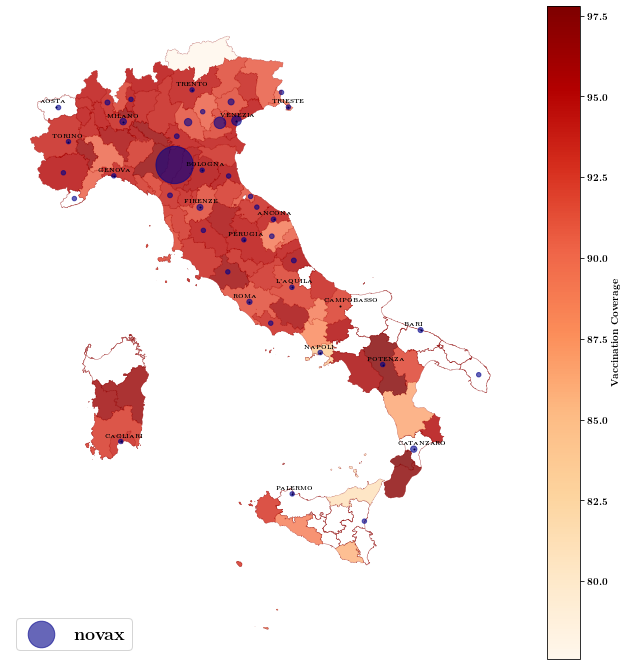

In [8]:
plt.figure()
fig, ax = plt.subplots(figsize=(12,12)) # Create a figure and an axes.
data.boundary.plot(ax=ax,color='darkred',linewidth=0.5,alpha=0.6,zorder=1)
data.plot(ax=ax,column='COPERTURA_MEDIA',cmap='OrRd',legend=True,alpha=0.8,zorder=2,
                   legend_kwds={'label': r"\bf{Vaccination Coverage}",
                       'orientation': "vertical"})
gdf_region.plot(ax=ax,column='capitals',color='black',markersize=1,zorder=3)
gdf.plot(ax=ax,markersize=list(20**3*df[('user','province_weight')]+20),color='darkblue',alpha=0.6,zorder=4,
         legend=True,label=r'\bf{novax}')

ax.legend(loc='lower left',fontsize=18,frameon=True)
ax.set_axis_off()

# Plot city names on the basemap
for index, row in df_region.iterrows():
    plt.text(row['lon_WGS']-0.35*10**5, row['lat_WGS']+0.1*10**5, r'\bf{'+str(row['capitals'])+'}', color='black', fontsize=5,zorder=6)
    
plt.savefig("map_2018.pdf",format='pdf',bbox_inches = "tight")

## Data 2019

In [9]:
# Load Italy province map
fp = 'map/ProvCM01012018_WGS84.shp'
data = gpd.read_file(fp)

# Load epidemiological dataset
epi = 'useful_datasets/dati_sanitari_2018.xlsx'
data_epi = pd.read_excel(epi,engine='openpyxl')

prov_data_epi = list(data_epi['Provincia'])
prov_data = list(data_epi['Copertura_media'])
for i in range(len(prov_data_epi)):
    # If city is null, associate latitude and longitude of the capital of the region
    mask_DEN_PROV = data['DEN_PROV'].str.contains(fr'\b{prov_data_epi[i]}\b', regex=True, case=False)
    mask_DEN_CM = data['DEN_CM'].str.contains(fr'\b{prov_data_epi[i]}\b', regex=True, case=False)
    mask_DEN_PCM = data['DEN_PCM'].str.contains(fr'\b{prov_data_epi[i]}\b', regex=True, case=False)
    data.loc[mask_DEN_PROV,'COPERTURA_MEDIA'] = prov_data[i]
    data.loc[mask_DEN_CM,'COPERTURA_MEDIA'] = prov_data[i]
    data.loc[mask_DEN_PCM,'COPERTURA_MEDIA'] = prov_data[i]

In [10]:
# Load tweet dataset
df = pd.read_excel('filtered_data/tweet_province_dataset_2019.xlsx',engine='openpyxl',index_col=0,header=[0,1])

xx, yy = pp(df[('user','lon_province')].values, df[('user','lat_province')].values)
df[('user','lon_province_WGS')] = xx
df[('user','lat_province_WGS')] = yy

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df[('user','lon_province_WGS')], df[('user','lat_province_WGS')]))
df.head(5)

user                      \
       screen_name                  id   
0      SserCarlo81          2306567981   
1         andmar76  715644689622372352   
2         74Sticca           743658943   
3  FabrizioMaiozzi           384818191   
7          nazucox            34552680   

                                                                       \
                                         description         location   
0  In my defence what is there to say\nWe destroy...           milano   
1                                               None    lucca toscana   
2                                               None  pescara abruzzo   
3                   Un pò di tutto.\nUn pò di più...       roma lazio   
7                                               None            prato   

                                                               \
  followers_count favourites_count                 created_at   
0             654            99048 2014-01-26 22:22:38.000000   
1             242            21527 2016-03-31 20:59:24.000000   
2              83             5746 2012-08-07 20:16:03.000000   
3             848            31059 2011-10-04 11:32:10.000001   
7              86            10916 2009-04-23 06:26:00.000001   

                 tweet                             \
                    id                 created_at   
0  1091102942776701056 2019-01-31 22:36:27.000001   
1  1091097585249591040 2019-01-31 22:15:09.999999   
2  1091094881643184000 2019-01-31 22:04:26.000000   
3  1091084543954685952 2019-01-31 21:23:21.000000   
7  1091075556433714944 2019-01-31 20:47:38.000000   

                                                      ...     user  \
                                                text  ... province   
0  RT @angycocco: Vergogna vergogna e ancora verg...  ...   milano   
1  RT @Cinzia15021967: #libertadiscelta #IONONVOT...  ...    lucca   
2  @GiuliaGrilloM5S  io in 24h dalle sue affermaz...  ...  pescara   
3  RT @NonVaccinato: - Viene riconosciuta la corr...  ...     roma   
7  RT @angycocco: Vergogna vergogna e ancora verg...  ...    prato   

                                                                \
  lat_province lon_province tag total_population   user_weight   
0    45.466800     9.190500   1          3250077  3.076850e-07   
1    44.017764    10.454430   1           383477  6.441064e-04   
2    42.310262    13.957590   1           317366  1.890562e-04   
3    41.893320    12.482932   1          4263542  1.062497e-04   
7    43.935718    11.094147   1           256534  3.898119e-06   

                                                     \
  province_weight lon_province_WGS lat_province_WGS   
0        0.005757    514891.899493     5.034826e+06   
1        0.024137    616573.287631     4.874874e+06   
2        0.001134    908623.616739     4.696141e+06   
3        0.003173    788948.967941     4.643800e+06   
7        0.000101    668079.011680     4.866865e+06   

                         geometry  
                                   
0  POINT (514891.899 5034825.739)  
1  POINT (616573.288 4874874.089)  
2  POINT (908623.617 4696140.939)  
3  POINT (788948.968 4643800.061)  
7  POINT (668079.012 4866864.962)  

[5 rows x 27 columns]

/Users/alicepagano/anaconda3/envs/life/lib/python3.7/site-packages/geopandas/plotting.py:573: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


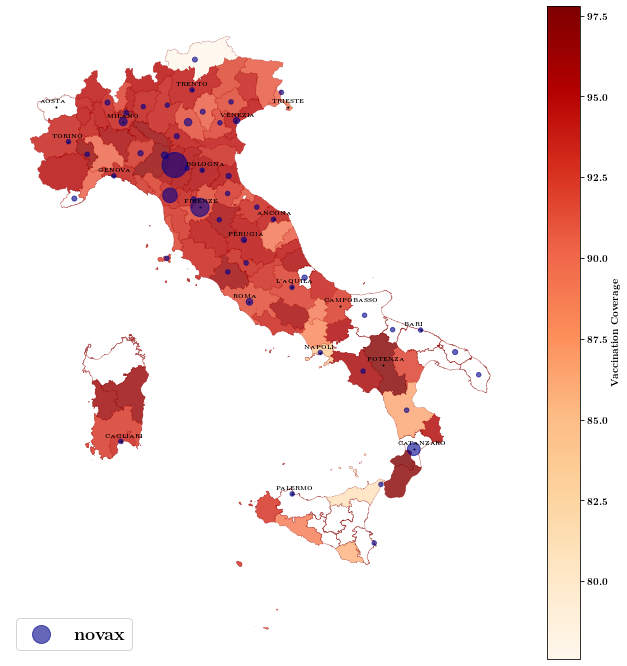

In [11]:
fig, ax = plt.subplots(figsize=(12,12)) # Create a figure and an axes.
data.boundary.plot(ax=ax,color='darkred',linewidth=0.5,alpha=0.6,zorder=1)
data.plot(ax=ax,column='COPERTURA_MEDIA',cmap='OrRd',legend=True,alpha=0.8,zorder=2,
                   legend_kwds={'label': r"\bf{Vaccination Coverage}",
                       'orientation': "vertical"})
gdf_region.plot(ax=ax,column='capitals',color='black',markersize=1,zorder=3)
gdf.plot(ax=ax,markersize=list(20**3*df[('user','province_weight')]+20),color='darkblue',alpha=0.6,zorder=4,
         legend=True,label=r'\bf{novax}')

ax.legend(loc='lower left',fontsize=18,frameon=True)
ax.set_axis_off()

# Plot city names on the basemap
for index, row in df_region.iterrows():
    plt.text(row['lon_WGS']-0.35*10**5, row['lat_WGS']+0.1*10**5, r'\bf{'+str(row['capitals'])+'}', color='black', fontsize=5,zorder=6)
    
plt.savefig("map_2019.pdf",format='pdf',bbox_inches = "tight")

## Data 2020

In [12]:
# Load Italy province map
fp = 'map/ProvCM01012018_WGS84.shp'
data = gpd.read_file(fp)

# Load epidemiological dataset
epi = 'useful_datasets/dati_sanitari_2018.xlsx'
data_epi = pd.read_excel(epi,engine='openpyxl')

prov_data_epi = list(data_epi['Provincia'])
prov_data = list(data_epi['Copertura_media'])
for i in range(len(prov_data_epi)):
    # If city is null, associate latitude and longitude of the capital of the region
    mask_DEN_PROV = data['DEN_PROV'].str.contains(fr'\b{prov_data_epi[i]}\b', regex=True, case=False)
    mask_DEN_CM = data['DEN_CM'].str.contains(fr'\b{prov_data_epi[i]}\b', regex=True, case=False)
    mask_DEN_PCM = data['DEN_PCM'].str.contains(fr'\b{prov_data_epi[i]}\b', regex=True, case=False)
    data.loc[mask_DEN_PROV,'COPERTURA_MEDIA'] = prov_data[i]
    data.loc[mask_DEN_CM,'COPERTURA_MEDIA'] = prov_data[i]
    data.loc[mask_DEN_PCM,'COPERTURA_MEDIA'] = prov_data[i]

In [13]:
# Load tweet dataset
df = pd.read_excel('filtered_data/tweet_province_dataset_2020.xlsx',engine='openpyxl',index_col=0,header=[0,1])

xx, yy = pp(df[('user','lon_province')].values, df[('user','lat_province')].values)
df[('user','lon_province_WGS')] = xx
df[('user','lat_province_WGS')] = yy

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df[('user','lon_province_WGS')], df[('user','lat_province_WGS')]))
df.head(5)

user                       \
     screen_name                   id   
0  calzelunghe17           4893362397   
1      menelik40            519786647   
2      xenonian1           3327831430   
3   CLiVaToscana   923171889891209216   
4   AndreaLisi15  1172571984967941888   

                                                                        \
                                         description          location   
0  Leggere è una forma di felicità, non si può ob...    belluno veneto   
1                                               None  salerno campania   
2  Operatore cinema/tv,fotografo,cinefilo. Amo i ...        roma italy   
3  Comitato per la Libertà di scelta Vaccinale - ...    toscana italia   
4                                               None  milano lombardia   

                                                                      tweet  \
  followers_count favourites_count          created_at                   id   
0             441            29476 2016-02-09 23:18:19  1223301908783301120   
1            1044             7659 2012-03-09 20:15:49  1223229885235200000   
2            1406           178761 2015-06-15 19:29:51  1223221289411890944   
3             608              512 2017-10-25 12:58:25  1223175880605827072   
4             224             6138 2019-09-13 18:05:31  1220828033847889920   

                              \
                  created_at   
0 2020-01-31 17:47:57.000001   
1 2020-01-31 13:01:45.000000   
2 2020-01-31 12:27:36.000000   
3 2020-01-31 09:27:10.000000   
4 2020-01-24 21:57:39.000000   

                                                      ...     user  \
                                                text  ... province   
0  RT @CLiVaToscana: Ma come? Non avevano detto c...  ...  belluno   
1  RT @CLiVaToscana: Ma come? Non avevano detto c...  ...  salerno   
2  RT @CLiVaToscana: Ma come? Non avevano detto c...  ...     roma   
3  Ma come? Non avevano detto che con la 119 era ...  ...  firenze   
4  RT @mirddyn_rm: Giusto, ha ragione. Oggigiorno...  ...   milano   

                                                                \
  lat_province lon_province tag total_population   user_weight   
0    46.280541    12.078914   1           202269  4.943911e-06   
1    40.419442    15.310756   1          1087055  9.199167e-07   
2    41.893320    12.482932   1          4263542  2.580014e-06   
3    43.769871    11.255576   1           998976  7.667852e-04   
4    45.466800     9.190500   1          3250077  9.230551e-07   

                                                     \
  province_weight lon_province_WGS lat_province_WGS   
0    4.943911e-06     7.371947e+05     5.129826e+06   
1    9.199167e-07     1.035547e+06     4.493478e+06   
2    2.896653e-04     7.889490e+05     4.643800e+06   
3    7.695881e-03     6.815384e+05     4.848786e+06   
4    1.987645e-04     5.148919e+05     5.034826e+06   

                          geometry  
                                    
0   POINT (737194.678 5129826.473)  
1  POINT (1035546.925 4493477.923)  
2   POINT (788948.968 4643800.061)  
3   POINT (681538.375 4848786.015)  
4   POINT (514891.899 5034825.739)  

[5 rows x 27 columns]

/Users/alicepagano/anaconda3/envs/life/lib/python3.7/site-packages/geopandas/plotting.py:573: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


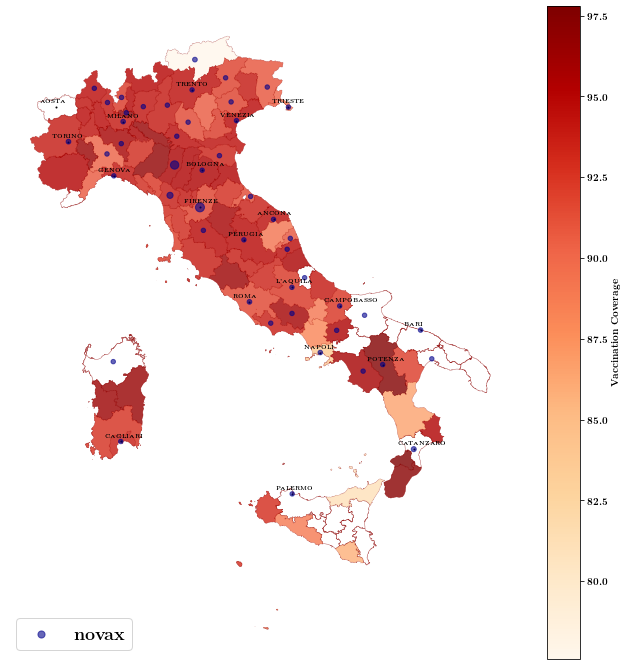

In [14]:
fig, ax = plt.subplots(figsize=(12,12)) # Create a figure and an axes.
data.boundary.plot(ax=ax,color='darkred',linewidth=0.5,alpha=0.6,zorder=1)
data.plot(ax=ax,column='COPERTURA_MEDIA',cmap='OrRd',legend=True,alpha=0.8,zorder=2,
                   legend_kwds={'label': r"\bf{Vaccination Coverage}",
                       'orientation': "vertical"})
gdf_region.plot(ax=ax,column='capitals',color='black',markersize=1,zorder=3)
gdf.plot(ax=ax,markersize=list(20**3*df[('user','province_weight')]+20),color='darkblue',alpha=0.6,zorder=4,
         legend=True,label=r'\bf{novax}')

ax.legend(loc='lower left',fontsize=18,frameon=True)
ax.set_axis_off()

# Plot city names on the basemap
for index, row in df_region.iterrows():
    plt.text(row['lon_WGS']-0.35*10**5, row['lat_WGS']+0.1*10**5, r'\bf{'+str(row['capitals'])+'}', color='black', fontsize=5,zorder=6)
    
plt.savefig("map_2020.pdf",format='pdf',bbox_inches = "tight")